In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = gpd.read_file('../data/cincinnati_crime_4326.gpkg')

In [4]:
data

,ID,AREA,BLOCK,BG,TRACT,COUNTY,MSA,POPULATION,MALE,FEMALE,...,DENSITY,BURGLARY,ASSAULT,THEFT,BURG_D,ASSALT_D,THEFT_D,lon,lat,geometry
0,726907.0,0.09,390610042002001,390610042002,39061004200,39061,1640,479.0,221.0,258.0,...,5384.7901,1,0,4,1.0,0.0,1.0,-84.474036,39.123861,POINT (-84.47404 39.12386)
1,695744.0,0.01,390610022004003,390610022004,39061002200,39061,1640,85.0,39.0,46.0,...,6643.1423,0,2,2,0.0,1.0,1.0,-84.506841,39.126002,POINT (-84.50684 39.126)
2,695762.0,0.01,390610033002017,390610033002,39061003300,39061,1640,29.0,18.0,11.0,...,4326.5018,0,0,0,0.0,0.0,0.0,-84.507346,39.128185,POINT (-84.50735 39.12819)
3,695780.0,0.01,390610022004002,390610022004,39061002200,39061,1640,117.0,59.0,58.0,...,20784.6991,2,3,4,1.0,1.0,1.0,-84.505117,39.125774,POINT (-84.50512 39.12577)
4,695798.0,0.02,390610033001009,390610033001,39061003300,39061,1640,96.0,51.0,45.0,...,4019.0506,0,0,2,0.0,0.0,1.0,-84.505584,39.127243,POINT (-84.50558 39.12724)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,703629.0,0.01,390610067003000,390610067003,39061006700,39061,1640,110.0,48.0,62.0,...,9461.9681,0,1,1,0.0,1.0,1.0,-84.496141,39.144163,POINT (-84.49614 39.14416)
453,703648.0,0.01,390610067004004,390610067004,39061006700,39061,1640,86.0,32.0,54.0,...,10415.8913,4,0,2,1.0,0.0,1.0,-84.493405,39.142274,POINT (-84.4934 39.14227)
454,703666.0,0.02,390610067004003,390610067004,39061006700,39061,1640,0.0,0.0,0.0,...,0.0000,0,0,1,0.0,0.0,1.0,-84.492954,39.143538,POINT (-84.49295 39.14354)
455,703686.0,0.02,390610068002007,390610068002,39061006800,39061,1640,278.0,121.0,157.0,...,13517.0854,2,6,10,1.0,1.0,1.0,-84.492956,39.144956,POINT (-84.49296 39.14496)


In [5]:
burglary = data['BURGLARY']
assault = data['ASSAULT']
theft = data['THEFT']

In [6]:
features = data[['DENSITY', 'MALE', 'FEMALE', 'MEDIAN_AGE', 'WHITE', 'BLACK', 'AMINDIAN', 'ASIAN', 'HAWAIIAN', 'OTHER_RACE', 'NH_WHITE',
                 'AVG_HHSIZE', 'AVG_FAMSIZ', 'HU_OCCUPIE', 'HU_VACANT', 'OCCHU_OWNE', 'OCCHU_RENT', 'IN_HOUSEHO', 'GROUP_QUAR',
                 'HH_FAMILY', 'HH_NONFAMI']]

In [7]:
loc = data[['lon', 'lat']]

In [8]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp = train_test_split(features, theft, loc, train_size=0.8, random_state=42)

In [9]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [10]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=1, min_child_weight=1, colsample_bytree=0.8, objective='count:poisson')

In [11]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='count:poisson', ...)

In [12]:
model.score(X_test, y_test)

0.19133681058883667

In [13]:
model.score(X_train, y_train)

0.5307097434997559

In [14]:
explainer = GeoConformalizedExplainer(model, X_train, X_calib, loc_calib.values, loc_test.values, 0.1, 0.15)

In [15]:
results = explainer.uncertainty_aware_explain(x_test=X_test)

  0%|          | 0/21 [00:00<?, ?it/s]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:20:53] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
 38%|███▊      | 8/21 [00:23<00:37,  2.92s/it]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:20:54] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:20:55] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are no

In [16]:
results.accuracy_summary()

,coverage_probability,R2,RMSE,SHAP_Var,Pred_SHAP_Var
DENSITY,1.000000,9.999999e-01,0.000055,6.298203e-02,6.295666e-02
MALE,1.000000,9.999999e-01,0.000037,1.286012e-02,1.285206e-02
FEMALE,1.000000,-4.131276e+09,0.000004,8.470329e-20,3.388132e-21
MEDIAN_AGE,0.978261,9.999826e-01,0.000057,1.899617e-04,1.884108e-04
WHITE,1.000000,9.999969e-01,0.000038,4.705523e-04,4.688974e-04
BLACK,0.913043,9.999993e-01,0.000048,3.424489e-03,3.419357e-03
AMINDIAN,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
ASIAN,0.956522,9.999996e-01,0.000082,1.897654e-02,1.895400e-02
HAWAIIAN,1.000000,-7.647990e+06,0.000005,8.673617e-19,8.673617e-19
OTHER_RACE,1.000000,9.999998e-01,0.000054,1.089790e-02,1.088662e-02


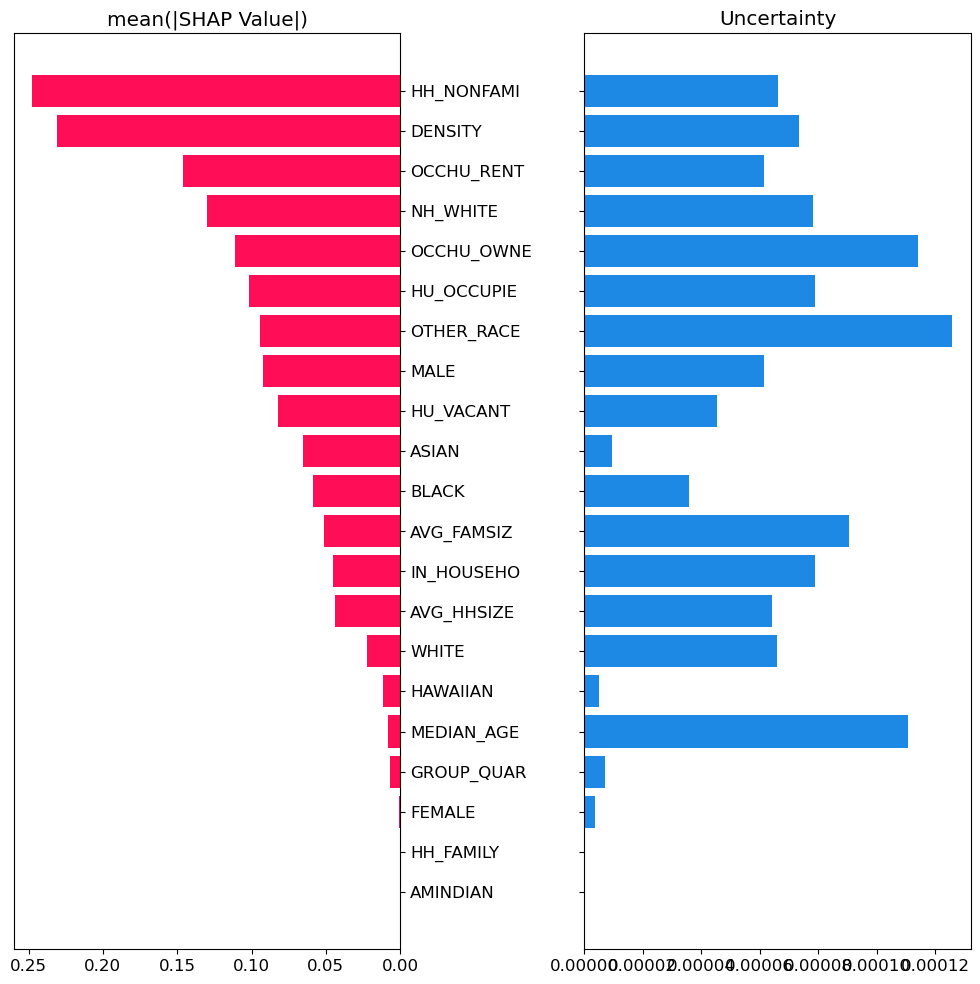

In [17]:
results.plot_absolute_shap_value_with_uncertainty()

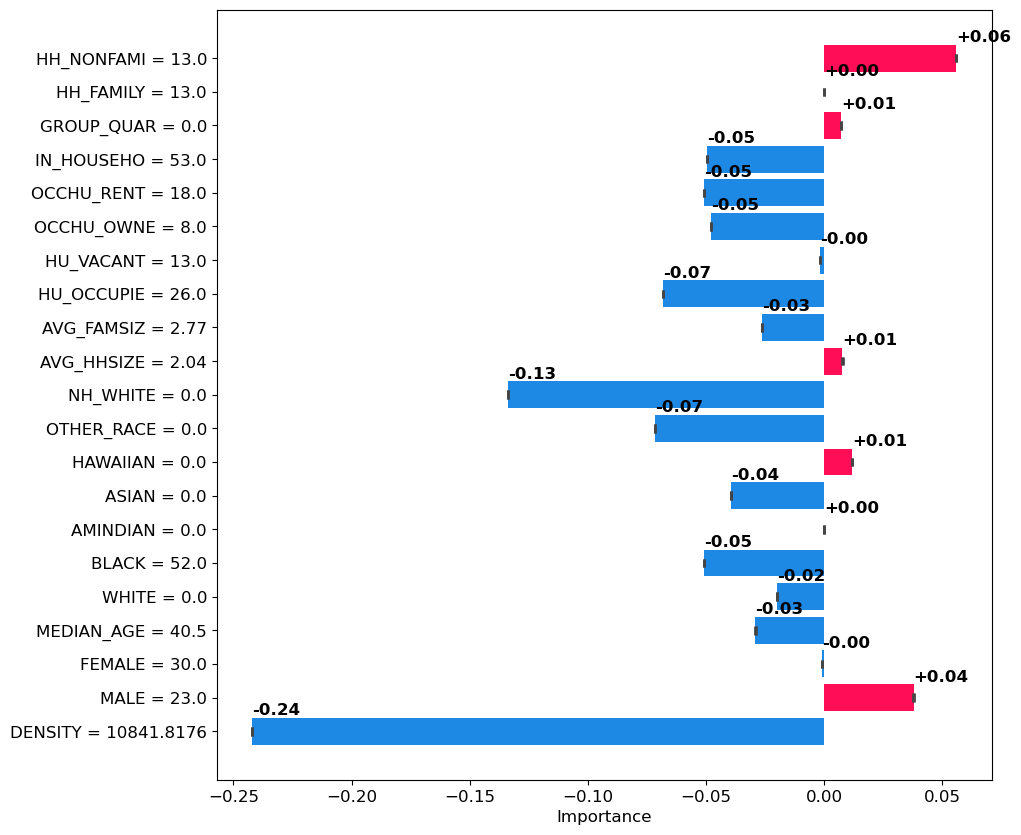

In [18]:
results.plot_shap_values_with_uncertainty(10)

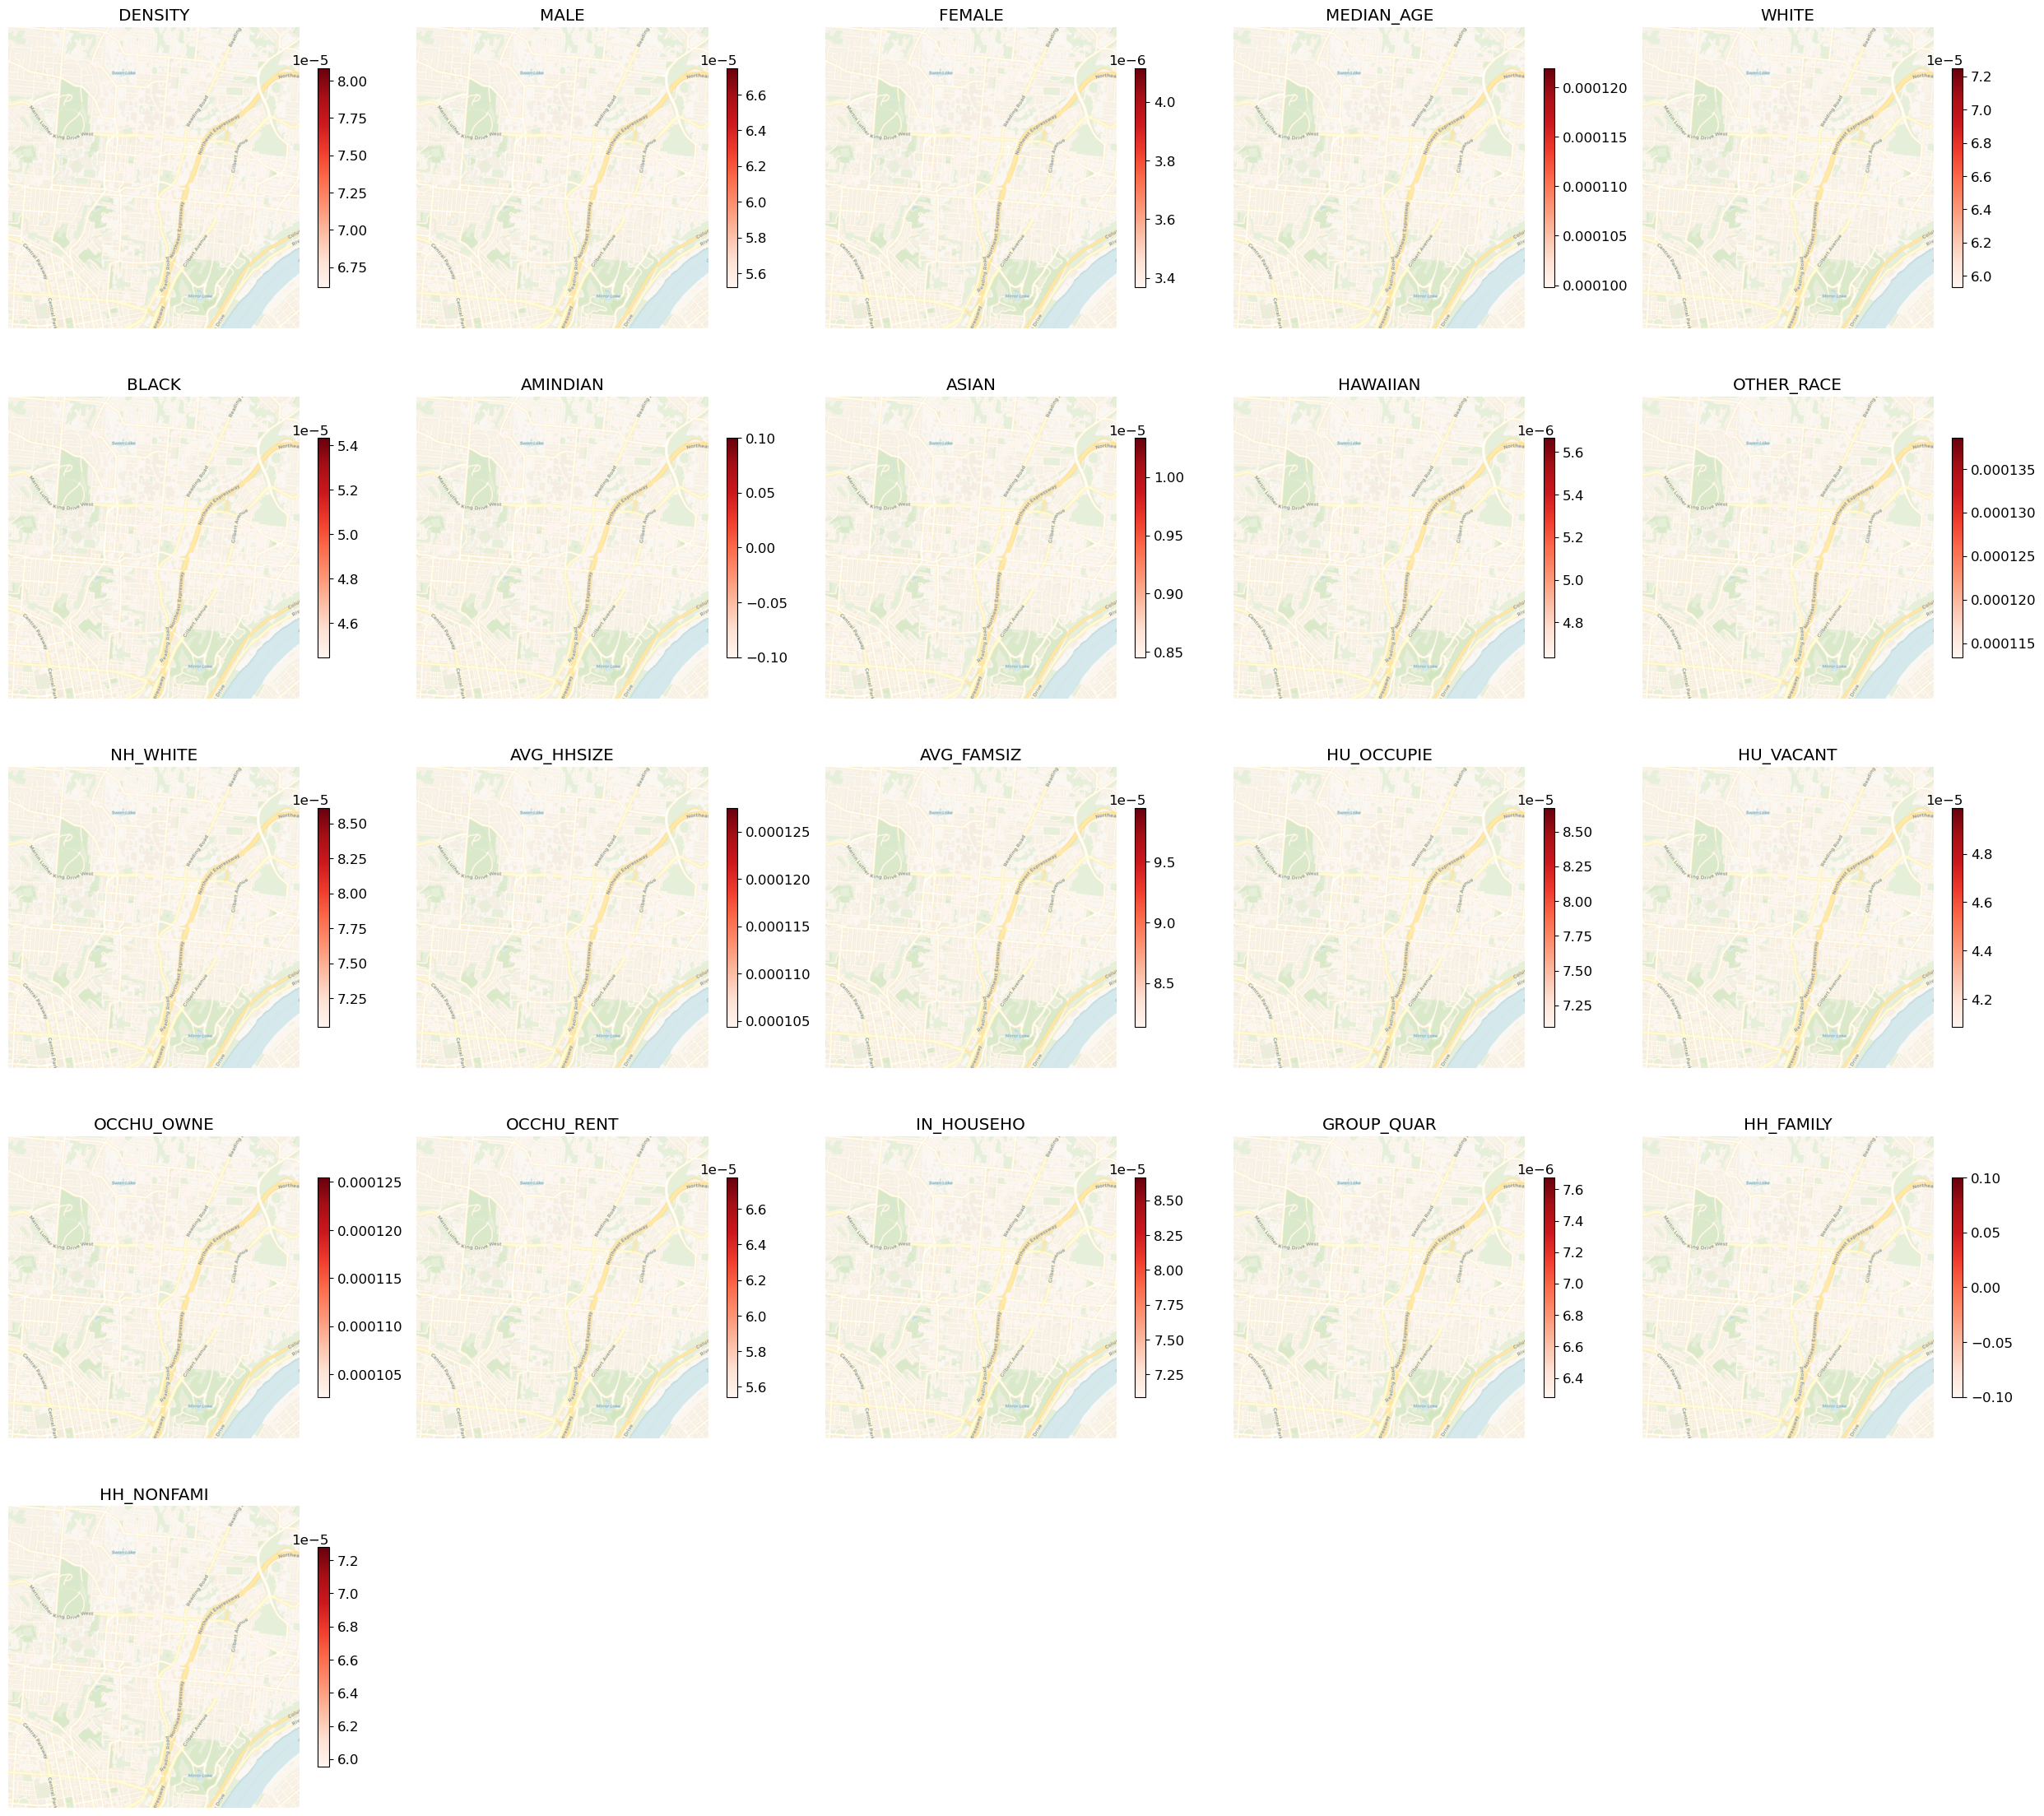

In [19]:
results.plot_geo_uncertainty(figsize=(25, 25), shrink=0.4)

In [20]:
results.result_geo

,DENSITY_shap,MALE_shap,FEMALE_shap,MEDIAN_AGE_shap,WHITE_shap,BLACK_shap,AMINDIAN_shap,ASIAN_shap,HAWAIIAN_shap,OTHER_RACE_shap,...,HH_FAMILY_pred,HH_NONFAMI_geo_uncertainty,HH_NONFAMI_uncertainty,HH_NONFAMI_upper_bound,HH_NONFAMI_lower_bound,HH_NONFAMI_coverage_probability,HH_NONFAMI_pred,x,y,geometry
0,-0.242140,0.037907,-0.000691,0.003071,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,-0.156468,-0.156600,1.0,-0.156534,-84.503684,39.122984,POINT (-84.50368 39.12298)
1,-0.242140,0.037907,-0.000691,0.003071,0.030890,-0.050917,0.0,-0.039450,0.011748,0.219067,...,0.0,0.000066,0.000066,0.204903,0.204771,1.0,0.204837,-84.524163,39.129113,POINT (-84.52416 39.12911)
2,-0.079179,0.037907,-0.000691,0.003071,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,-0.416126,-0.416258,1.0,-0.416192,-84.505877,39.147076,POINT (-84.50588 39.14708)
3,-0.079179,0.037907,-0.000691,-0.029088,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,0.204903,0.204771,1.0,0.204837,-84.512644,39.145430,POINT (-84.51264 39.14543)
4,0.079980,0.037907,-0.000691,0.003071,-0.019965,0.085771,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,0.204903,0.204771,1.0,0.204837,-84.491254,39.128520,POINT (-84.49125 39.12852)
5,0.367774,-0.217310,-0.000691,0.003071,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,-0.416126,-0.416258,1.0,-0.416192,-84.499627,39.126875,POINT (-84.49963 39.12687)
6,0.079980,0.037907,-0.000691,-0.029088,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,-0.064365,-0.064498,1.0,-0.064431,-84.499582,39.125397,POINT (-84.49958 39.1254)
7,0.198495,-0.217310,-0.000691,-0.029088,-0.019965,-0.050917,0.0,-0.039450,0.011748,0.219067,...,0.0,0.000066,0.000066,-0.416126,-0.416258,1.0,-0.416192,-84.504233,39.114431,POINT (-84.50423 39.11443)
8,0.367774,0.037907,-0.000691,0.003071,-0.019965,0.039783,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,-0.064365,-0.064498,1.0,-0.064431,-84.483790,39.138593,POINT (-84.48379 39.13859)
9,-0.242140,0.037907,-0.000691,0.003071,-0.019965,-0.050917,0.0,-0.039450,0.011748,-0.071568,...,0.0,0.000066,0.000066,0.204903,0.204771,1.0,0.204837,-84.504560,39.132677,POINT (-84.50456 39.13268)


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |         

did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 40% (2 of 5) |##########                | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 60% (3 of 5) |###############           | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 80% (4 of 5) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
100% (5 of 5) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: divide by zero encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/py

did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 40% (2 of 5) |##########                | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 60% (3 of 5) |###############           | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 80% (4 of 5) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
100% (5 of 5) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

did not converge


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5

did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 40% (2 of 5) |##########                | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 60% (3 of 5) |###############           | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 80% (4 of 5) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
100% (5 of 5) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: divide by zero encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/py

did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 40% (2 of 5) |##########                | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 60% (3 of 5) |###############           | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
 80% (4 of 5) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


did not converge


/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank
100% (5 of 5) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


did not converge


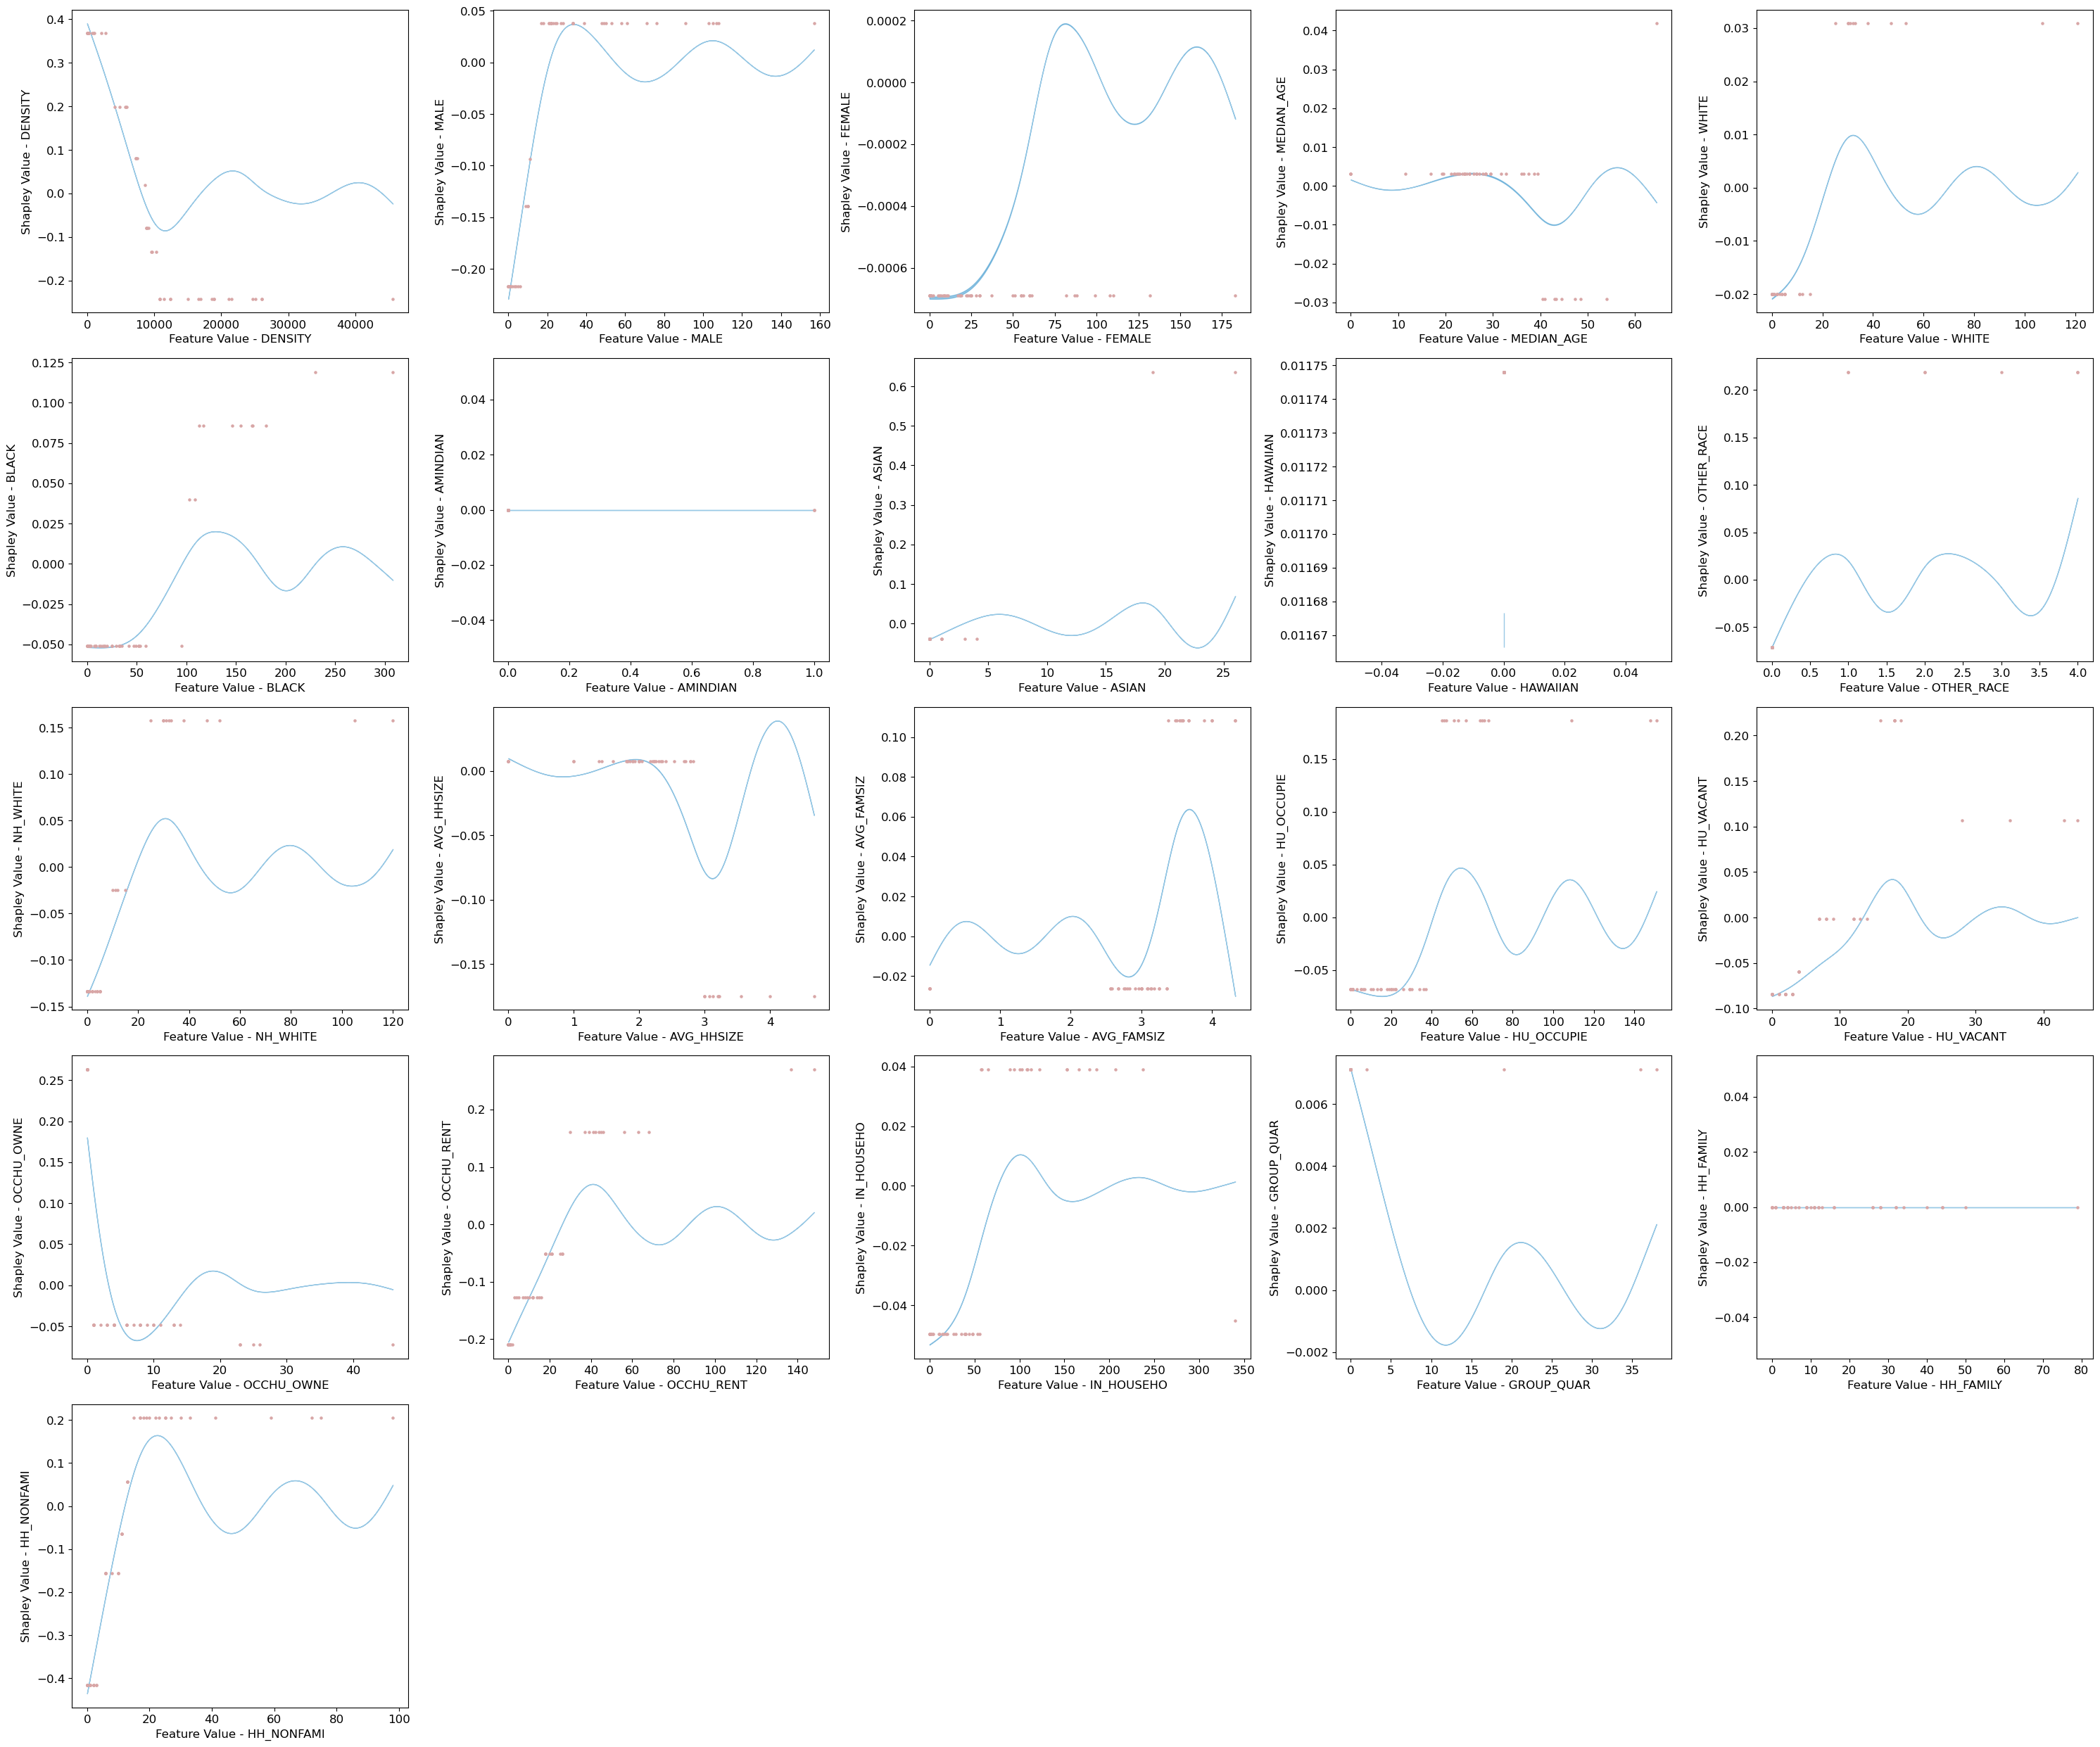

In [21]:
results.plot_partial_dependence_with_fitted_bounds()